# Comparison with Marbach 2021 article

## Preambule

In [74]:
from brownpy.gpu_sim import Universe
import brownpy.topology as Top
from brownpy.utils import prefix, unwrap
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import numpy as np
from tqdm.notebook import tqdm
plt.style.use('default')
import cupy as cp
import pandas as pd

In [2]:
from pathlib import Path
Path('./4').mkdir(exist_ok=True)

In [3]:
# Diffusion coefficient
D = 1.5E-4 # A²/fs  (1.5E-9 m²/s) - Diffusion coefficient

# Geometry
R = 1E2 # A (10nm) - Pore radius
L = 500*R # A - Reservoir depht

# Timestep 
dt_marbach = int(0.05*R**2/D)
# dt = int(10**np.floor(np.log10(dt_marbach)))
dt = dt_marbach
N = 2*1024
print(f'dt = {dt:.2e} fs = {prefix(dt*1E-15)}s')

Nsteps = int(1.5*1E6/0.05)
print(f"Number of steps : {Nsteps:.2e}")

sampling = 100
intervals = np.int64(np.logspace(1,6,40)*R**2/D/dt/sampling)

data = {}
for factor in [0.04,0.10,0.20,0.40,0.95]:
    print('#################################')
    print(factor)
    data[factor] = {}
    Lm = R/factor # A - Reservoir height
    top = Top.ElasticPore1(L=L, Lm=Lm, R=R)
    u = Universe(N=N, top=top, D=D, dt=dt,
                output_path=f'pore_{factor:.2f}'.replace('.','_'))
    u.run(1_000_000, freq_dumps=100);
    data[factor]['u'] = u
    u.run(Nsteps)

    region_0 = u[1]['left'].astype(np.int16) # Number of particles in left part
    DeltaN = (N-region_0) - region_0 # Number difference : N_R - N_L 
    data[factor]['DeltaN'] = DeltaN

    # Compute <DeltaN(t)²>
    # signal = DeltaN[::sampling]
    # n_difference = np.zeros_like(intervals)
    # signal_d = cp.asarray(signal)
    # for i, inteval in tqdm(list(enumerate(intervals))):
    #     zeros_d = cp.asarray(np.ones(inteval)/ float(inteval))
    #     mean_d = cp.convolve(signal_d, zeros_d, 'valid')
    #     mean2_d = cp.convolve(signal_d**2, zeros_d, 'valid')
    #     var_d = mean2_d-mean_d**2
    #     n_difference[i] = (cp.mean(var_d)).get()
    # del signal_d, zeros_d, mean_d, mean2_d, var_d

dt = 3.33e+06 fs = 3.33 ns
Number of steps : 3.00e+07
0.04


  0%|          | 0/30000000 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 25.2 fs
Engine: 1.26 ns
Transfert to RAM: 99.8 ps
Total: 1.36 ns
------------------------------------------
CPU time per step and per particles:
Total: 2 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 600 ms


  0%|          | 0/40 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 23.7 fs
Engine: 1.23 ns
Transfert to RAM: 5.57 ps
Total: 1.23 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.25 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 375 ms
Reading 1 ...
... Done


  0%|          | 0/1000000 [00:00<?, ?it/s]

0.1


  0%|          | 0/30000000 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 25.8 fs
Engine: 1.29 ns
Transfert to RAM: 102 ps
Total: 1.4 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.84 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 552 ms


  0%|          | 0/40 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 23.8 fs
Engine: 1.25 ns
Transfert to RAM: 5.56 ps
Total: 1.25 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.27 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 380 ms
Reading 1 ...
... Done


  0%|          | 0/1000000 [00:00<?, ?it/s]

0.2


  0%|          | 0/30000000 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 25.3 fs
Engine: 1.29 ns
Transfert to RAM: 103 ps
Total: 1.39 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.8 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 540 ms


  0%|          | 0/40 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 24.5 fs
Engine: 1.25 ns
Transfert to RAM: 5.48 ps
Total: 1.25 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.27 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 380 ms
Reading 1 ...
... Done


  0%|          | 0/1000000 [00:00<?, ?it/s]

0.4


  0%|          | 0/30000000 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 26.1 fs
Engine: 1.29 ns
Transfert to RAM: 110 ps
Total: 1.4 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.93 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 579 ms


  0%|          | 0/40 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 24.5 fs
Engine: 1.25 ns
Transfert to RAM: 5.59 ps
Total: 1.25 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.27 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 381 ms
Reading 1 ...
... Done


  0%|          | 0/1000000 [00:00<?, ?it/s]

0.95


  0%|          | 0/30000000 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 25.9 fs
Engine: 1.3 ns
Transfert to RAM: 113 ps
Total: 1.41 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.86 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 557 ms


  0%|          | 0/40 [00:00<?, ?it/s]

With 2048 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 24.5 fs
Engine: 1.25 ns
Transfert to RAM: 5.5 ps
Total: 1.25 ns
------------------------------------------
CPU time per step and per particles:
Total: 1.27 ns
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 380 ms
Reading 1 ...
... Done


100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


In [75]:
intervals = np.logspace(-1,6,40) # in R²/D
intervals_dt = np.int64(intervals*R**2/D/dt) # In timesteps unit
for factor in tqdm(list(data.keys())):
    df = pd.DataFrame(data[factor]['DeltaN'])

    n_difference = []
    for interval in tqdm(intervals_dt, leave=False):
        n_difference.append(df.rolling(interval).var().mean()[0])
    data[factor]['n_difference'] = np.array(n_difference)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [79]:
colors = ['#F0916E', '#CC626C', '#B53F6E','#953473', '#722F6C'][::-1]

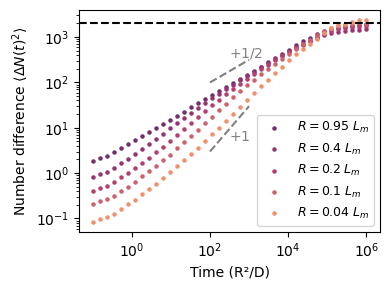

In [104]:
fig, ax = plt.subplots(figsize=(4,3))
# mask = (intervals>=5E1)*(intervals<=1E5)
for i, factor in enumerate(list(data.keys())[::-1]):
    c = colors[i]
    ax.scatter(intervals, data[factor]['n_difference'], 
              label=f'$R = {factor}\;L_m$', c=c, s=5)
ax.loglog([1E2, 1E3], 0.03*np.array([1E2, 1E3]), c='grey', ls='--')
ax.text(3E2, 0.03*3E2, '$+1$', c='grey',
        verticalalignment='top', horizontalalignment='left')
ax.loglog([1E2, 1E3], 10*(np.array([1E2, 1E3]))**(1/2), c='grey', ls='--')
ax.text(3E2, 20*(3E2)**(1/2), '$+1/2$', c='grey')
ax.legend(fontsize=9)
ax.set_xlabel('Time (R²/D)')
ax.set_ylabel('Number difference $\\left \\langle \\Delta N(t)^2  \\right \\rangle$')
ax.axhline(N, ls='--', c='k')
fig.tight_layout()
fig.savefig('4/DeltaN.png')
# ax.set_xlim(5E1, 1E5)
# ax.set_ylim(5E1, 1E5)

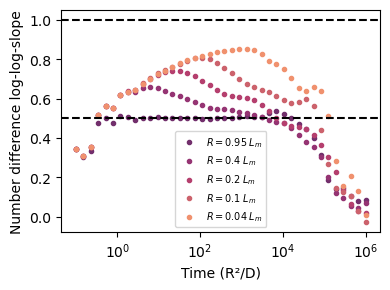

In [105]:
fig, ax = plt.subplots(figsize=(4,3))
# mask = (intervals>=5E1)*(intervals<=1E5)
for i, factor in enumerate(list(data.keys())[::-1]):
    c = colors[i]
    ax.scatter(intervals, np.gradient(np.log(data[factor]['n_difference']))/np.gradient(np.log(intervals)), 
              label=f'$R = {factor}\;L_m$', c=c, s=9)
# ax.loglog([1E2, 1E3], 0.03*np.array([1E2, 1E3]), c='grey', ls='--')
# ax.text(3E2, 0.03*3E2, '$+1$', c='grey',
#         verticalalignment='top', horizontalalignment='left')
# ax.loglog([1E2, 1E3], 10*(np.array([1E2, 1E3]))**(1/2), c='grey', ls='--')
# ax.text(3E2, 20*(3E2)**(1/2), '$+1/2$', c='grey')
ax.axhline(1.0, c='k', ls='--')
ax.axhline(0.5, c='k', ls='--')
ax.legend(fontsize=7)
ax.set_xlabel('Time (R²/D)')
ax.set_xscale('log')
ax.set_ylabel('Number difference log-log-slope')
# ax.axhline(N, ls='--', c='k')
fig.tight_layout()
fig.savefig('4/DeltaN_slope.png')
# ax.set_xlim(5E1, 1E5)
# ax.set_ylim(5E1, 1E5)

In [106]:
L**2/R**2

250000.0

In [8]:
from scipy.signal import welch
for factor in data.keys():
    freqs_welch_elastic, psd_welch_elastic = welch(data[factor]['DeltaN'], 1/dt , nperseg=1E5)
    data[factor]['psd'] = (freqs_welch_elastic, psd_welch_elastic)

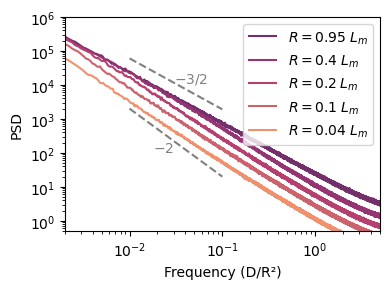

In [20]:
from scipy.signal import welch

fig, ax = plt.subplots(figsize=(4,3))
# mask = (intervals>=5E1)*(intervals<=1E5)
for i, factor in enumerate(list(data.keys())[::-1]):
    c=colors[i]
    # FT = np.fft.rfft(data[factor]['DeltaN'])
    # freq = np.fft.rfftfreq(Nsteps,dt)
    # psd = FT * np.conjugate(FT)
    freqs_welch_elastic, psd_welch_elastic = data[factor]['psd']
    ax.loglog(freqs_welch_elastic/(D/R**2), psd_welch_elastic/N**2, 
              label=f'$R = {factor} \; L_m$', c=c)
ax.loglog([1E-2, 1E-1], 0.2*np.array([1E-2, 1E-1])**-2, c='grey', ls='--')
ax.text(3E-2, 0.2*(3E-2)**-2, '$-2$', c='grey', 
        verticalalignment='top', horizontalalignment='right')
ax.loglog([1E-2, 1E-1], 60*np.array([1E-2, 1E-1])**(-3/2), c='grey', ls='--')
ax.text(3E-2, 60*(3E-2)**(-3/2), '$-3/2$', c='grey')
ax.legend(loc=1)
ax.set_xlabel('Frequency (D/R²)')
ax.set_ylabel('PSD')
ax.set_xlim(2E-3, 5)
ax.set_ylim(0.5, 1E6)
fig.tight_layout()
fig.savefig('4/PSD.png')

In [49]:
import pandas as pd

In [50]:
key = 0.95
df = pd.DataFrame(data[key]['DeltaN'])

In [61]:
df.rolling(19679906).var().mean()[0]

1896.8021837720923

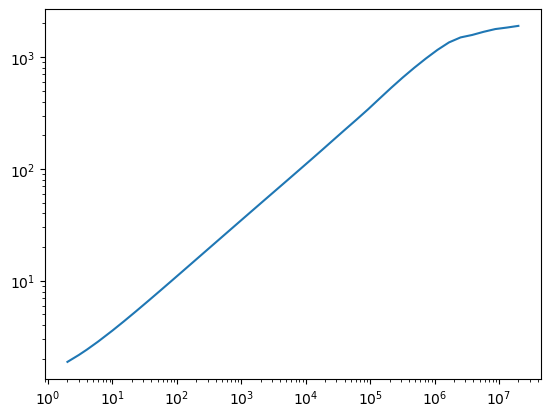

In [63]:
key = 0.95
df = pd.DataFrame(data[key]['DeltaN'])
intervals2 = np.int64(np.logspace(-1,6,40)*R**2/D/dt)
n_difference = []
for interval in intervals2:
    n_difference.append(df.rolling(interval).var().mean()[0])
plt.loglog(intervals2, n_difference)

# key = 0.1
# intervals2 = np.int64(np.logspace(-1,6,1000)*R**2/D/dt)
# n_difference = []
# for interval in intervals2:
#     n_difference.append(np.var(data[key]['DeltaN'][:interval]))
# plt.loglog(intervals2, n_difference)

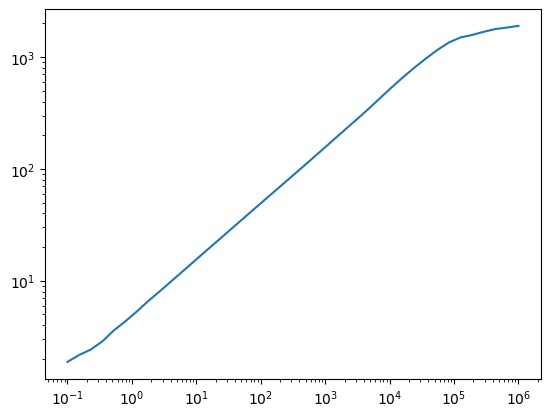

In [65]:
plt.loglog(np.logspace(-1,6,40), n_difference)

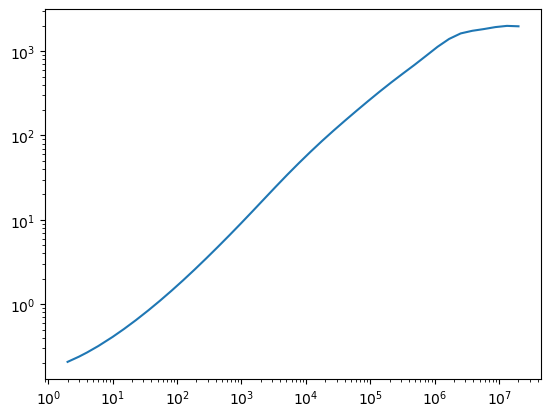

In [66]:
key = 0.1
df = pd.DataFrame(data[key]['DeltaN'])
intervals2 = np.int64(np.logspace(-1,6,40)*R**2/D/dt)
n_difference = []
for interval in intervals2:
    n_difference.append(df.rolling(interval).var().mean()[0])
plt.loglog(intervals2, n_difference)

# key = 0.1
# intervals2 = np.int64(np.logspace(-1,6,1000)*R**2/D/dt)
# n_difference = []
# for interval in intervals2:
#     n_difference.append(np.var(data[key]['DeltaN'][:interval]))
# plt.loglog(intervals2, n_difference)

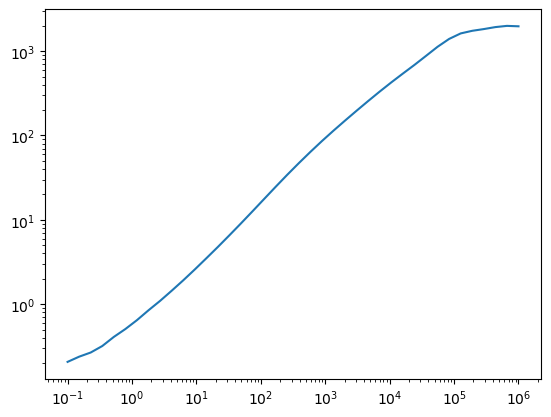

In [67]:
plt.loglog(np.logspace(-1,6,40), n_difference)

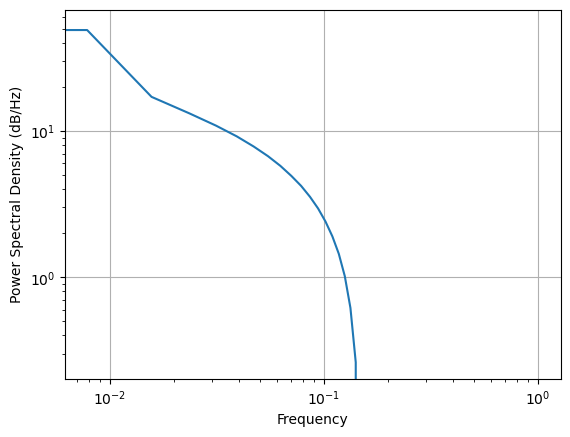

In [69]:
fig, ax =plt.subplots()
ax.psd(data[key]['DeltaN'])
ax.set_xscale('log')
ax.set_yscale('log')